In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [6]:
df.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [9]:
#convert categorical to numerical
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [37]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700


In [10]:
#split to feature(x) and target (y)
    
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']
X.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3


In [11]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

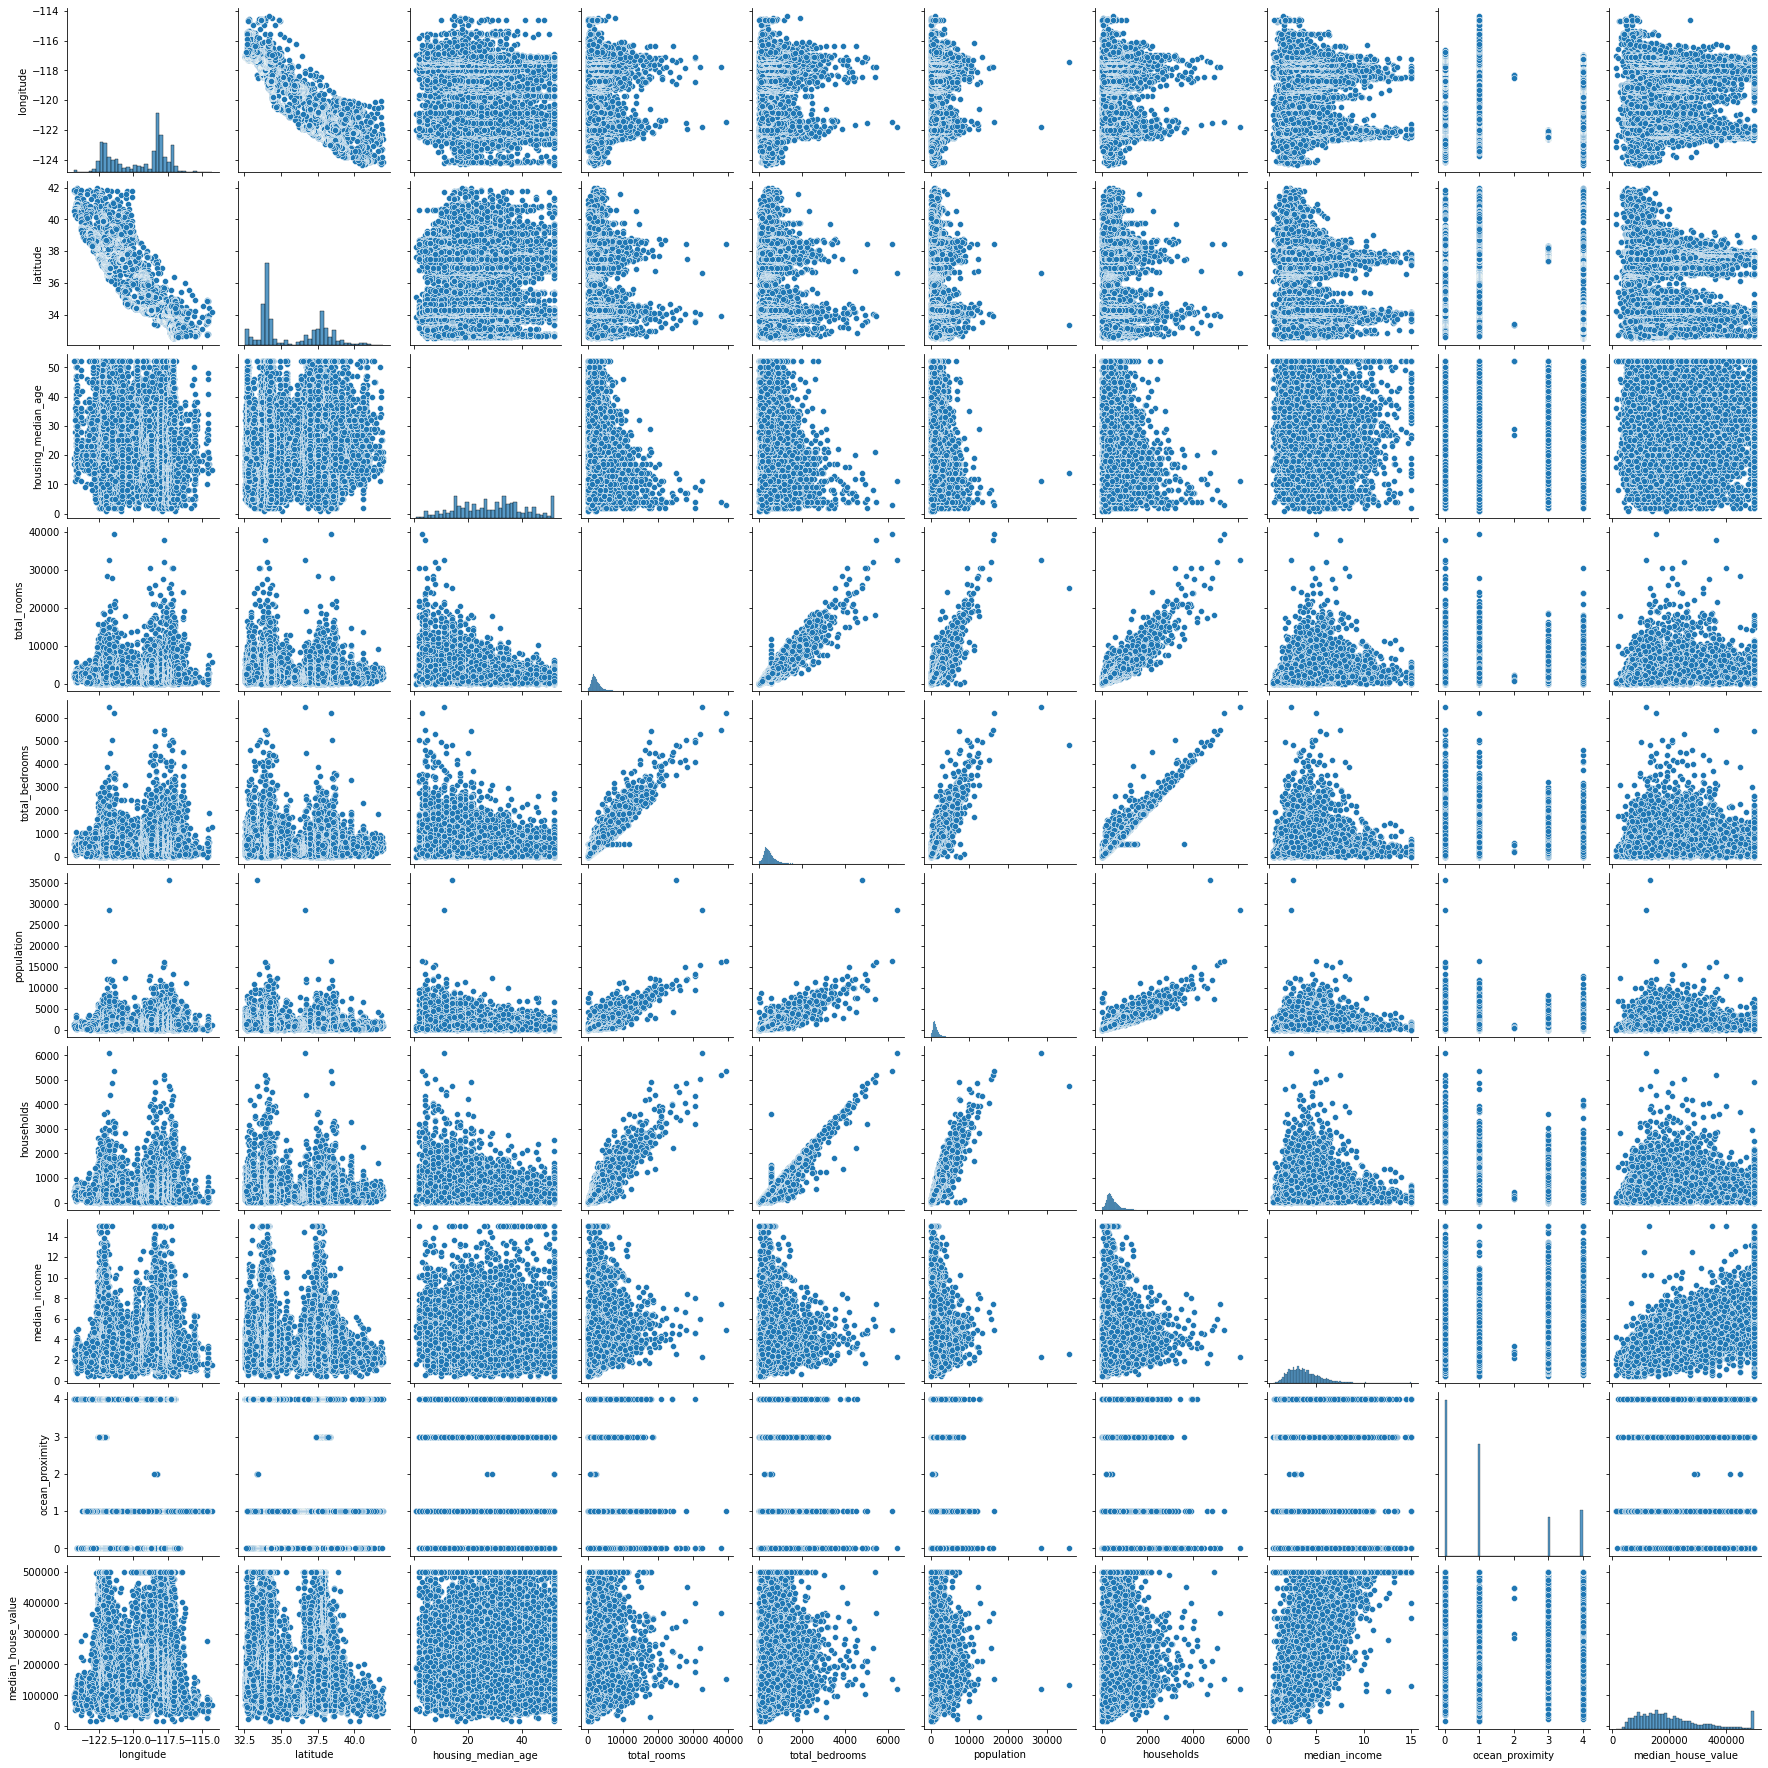

In [12]:
sns.pairplot(df)

<AxesSubplot:>

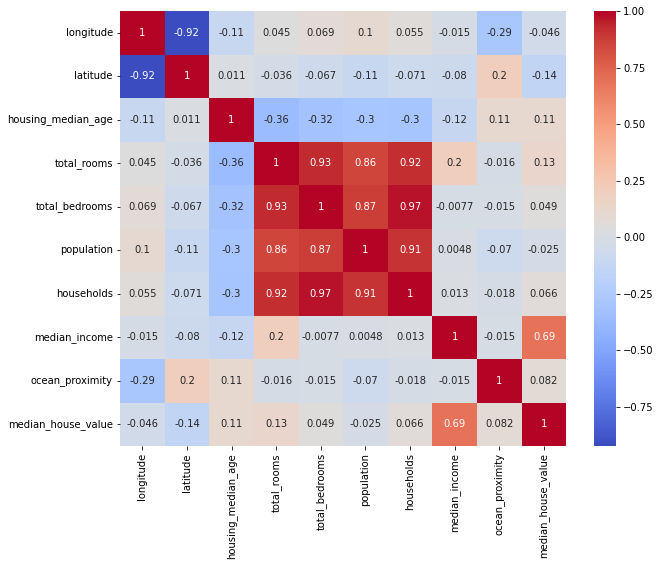

In [28]:
df_heatmap = df
correlation_matrix = df_heatmap.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

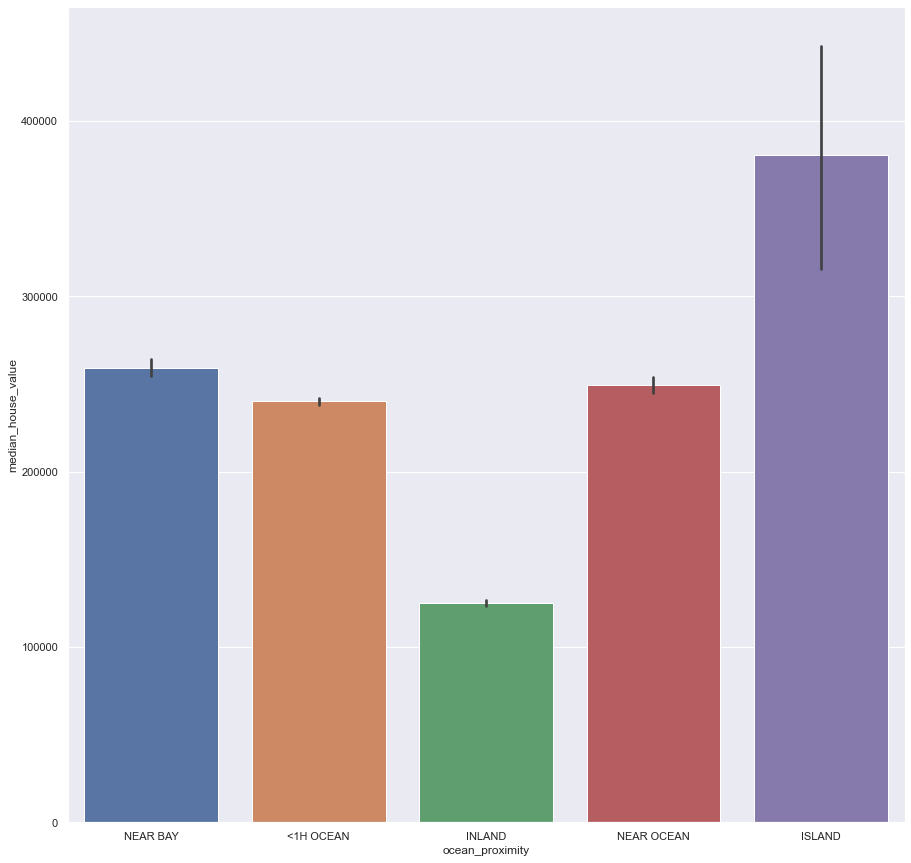

In [50]:
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(x='ocean_proximity', y='median_house_value', data=df)

In [13]:
ss = StandardScaler()
scaled_data = X.copy()
    
columns_to_scale = ["longitude", "latitude", "housing_median_age",
                    "total_rooms", "total_bedrooms", "population", "median_income"]

scaled_values = ss.fit_transform(scaled_data[columns_to_scale])

scaled_df = pd.DataFrame(data=scaled_values, columns=columns_to_scale, index = scaled_data.index)
scaled_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,2.344766
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,2.332238
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,1.782699
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,0.932968
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.012881
...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-1.216128
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-0.691593
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-1.142593
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-1.054583


In [14]:
len(scaled_df)

20640

In [15]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [16]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random forest Regression': RandomForestRegressor(),
    'Gradient Boost Regression': GradientBoostingRegressor(),
    'SVR': SVR()
}

results = []

In [17]:
for model_name,model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    
    results.append({
        "Model: " : model_name,    
        "R2 score: ": r2
    })

In [18]:
results_df = pd.DataFrame(results)
print(results_df)

                     Model:   R2 score: 
0          Linear Regression    0.626076
1           Ridge Regression    0.626076
2           Lasso Regression    0.626076
3   Decision Tree Regression    0.650018
4   Random forest Regression    0.818971
5  Gradient Boost Regression    0.770444
6                        SVR   -0.046890
